##### Created on 04/28/2022

##### This notebook is to get the GCM wind vs M relationship for the oceans over 30N to 70N. Will be compared with MERRA2+MAC and PPE outputs. 

##### Updating to retrieve PPE daily data and CESM2 daily data using the path link. Used PSL/SST

##### 5/24/2022 Update to get the theta at reference level of 1000hPa. take theta at 800hPa by weighted average of theta 700 and 850.
 


### Observations give higher winds in strong CAOs

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from readGCMs import read_var_mod
import calendar
from global_land_mask import globe
import glob
import math

In [2]:
#####Constants
Cp = 1004           #J/kg/K
Rd = 287            #J/kg/K
con= Rd/Cp

In [3]:
con

0.2858565737051793

# GCM

In [6]:
varname = ['sfcWind', 'tas','psl'] #'sfcWind', 'hfss', 'hfls', 'tas', 'ps', 'psl',
pvarname= ['ta']


In [7]:
#CESM2 2010 to 2015 historical
end = 0
for i in varname: 
    ncname = i+'_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500101-20141230.nc'
    d_path = '/glade/collections/cmip/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/day/'+i+'/gn/v20190624/'+i+'/'+ncname
    data =xr.open_dataset(d_path)

    if end == 0:
        lon  = data.variables['lon'][:]  #(lon: 288) [0.0, 1.25, 2.5, ... 356.25, 357.5, 358.75]
        lat  = data.variables['lat'][:]  #(lat: 192) [-90.0 , -89.057592, -88.115183, ... 88.115183,  89.057592, 90.0]
        time = data.variables['time'][:] #(time: 36)

    if i == 'ta':
        lev  = data.variables['plev'][:]
    
    locals()[i+'_0'] = data.variables[i][:]
    print(i+'_0', np.shape(locals()[i+'_0']))
    

sfcWind_0 (23400, 144, 192)
tas_0 (23400, 144, 192)
psl_0 (23400, 144, 192)


In [8]:
for i in pvarname: 
    ncname = i+'_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_20000101-20141230.nc'
    d_path = '/glade/collections/cmip/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/day/'+i+'/gn/v20190624/'+i+'/'+ncname
    data =xr.open_dataset(d_path)

    if end == 0:
        lon_ta  = data.variables['lon'][:]  #(lon: 288) [0.0, 1.25, 2.5, ... 356.25, 357.5, 358.75]
        lat_ta  = data.variables['lat'][:]  #(lat: 192) [-90.0 , -89.057592, -88.115183, ... 88.115183,  89.057592, 90.0]
        time_ta = data.variables['time'][:] #(time: 36)
        lev     = data.variables['plev'][:]
    
    locals()[i+'_0'] = data.variables[i][:]
    print(i+'_0', np.shape(locals()[i+'_0']))
    

ta_0 (5400, 8, 144, 192)


In [9]:
sfcWind_0

<xarray.Variable (time: 23400, lat: 144, lon: 192)>
[646963200 values with dtype=float32]
Attributes:
    standard_name:  wind_speed
    long_name:      Daily-Mean Near-Surface Wind Speed
    comment:        near-surface (usually, 10 meters) wind speed.
    units:          m s-1
    original_name:  mo: (stash: m01s03i230, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-20T06:12:23Z altered by CMOR: Treated scalar dime...

In [7]:
lev

<xarray.IndexVariable 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [10]:
for j in varname:
    locals()[j+str(0)] = locals()[j+'_'+str(0)][21600:22680,:,:]
    print(j+'0', np.shape(locals()[j+str(0)]))
    
for j in pvarname:
    locals()[j+str(0)] = locals()[j+'_'+str(0)][3600:4680,:,:]
    print(j+'0', np.shape(locals()[j+str(0)]))


sfcWind0 (1080, 144, 192)
tas0 (1080, 144, 192)
psl0 (1080, 144, 192)
ta0 (1080, 8, 144, 192)


In [11]:
print(time[21600],time[22679])

<xarray.Variable ()>
array(cftime.Datetime360Day(2010, 1, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time <xarray.Variable ()>
array(cftime.Datetime360Day(2012, 12, 30, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [12]:
print(time_ta[3600],time_ta[4679])

<xarray.Variable ()>
array(cftime.Datetime360Day(2010, 1, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time <xarray.Variable ()>
array(cftime.Datetime360Day(2012, 12, 30, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [13]:
theta_850 = ta0[:,1,:,:]*(100000/85000)**con


In [14]:
theta_700 = ta0[:,2,:,:]*(100000/70000)**con

In [15]:
theta_800 = theta_700 + ((2/3) * (theta_850 - theta_700))

In [16]:
theta_sfc = tas0*(100000/psl0)**con

In [17]:
M = theta_sfc - theta_800


In [89]:
print(np.max(psl0),np.min(psl0))
print(np.max(M),np.min(M))
print(np.max(theta_850),np.min(theta_850))

<xarray.Variable ()>
array(106573.81, dtype=float32) <xarray.Variable ()>
array(92797.875, dtype=float32)
<xarray.Variable ()>
array(1.23404589) <xarray.Variable ()>
array(-60.51881248)
<xarray.Variable ()>
array(328.31766, dtype=float32) <xarray.Variable ()>
array(224.97458, dtype=float32)


In [18]:
x_lat = np.array(lat)
lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (30)).argmin()])[0]
lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (70)).argmin()])[0]    

x_lon = lon
# lon_ind1 = np.where(x_lon == x_lon.flat[np.abs(x_lon - (-180)).argmin()])[0]
# lon_ind2 = np.where(x_lon == x_lon.flat[np.abs(x_lon - (180)).argmin()])[0]

x_sfcWind = sfcWind0
m_sfcWind = x_sfcWind[0:1094,lat_ind1[0]:lat_ind2[0],:]
lats = lat[lat_ind1[0]:lat_ind2[0]]

x_M = M
m_M = x_M[0:1094,lat_ind1[0]:lat_ind2[0],:]


In [19]:
cao = np.array(m_M)
sw  = np.array(m_sfcWind)

In [20]:
maskm = np.ones((len(sw),len(lats),len(lon)))

for a in range(len(lats)):
    for b in range(len(lon)):
        if globe.is_land(lats[a], lon[b]-180.)==True:
            maskm[:,a,b] = math.nan

In [21]:
plot_CAOI = np.array(np.multiply(maskm,cao))
wind      = np.array(np.multiply(maskm,sw))

In [25]:
np.min(sw)

0.12233734

In [26]:
plot_theta = plot_CAOI.ravel()
plot_wind = wind.ravel()

In [106]:
np.shape(plot_theta)

(6635520,)

In [107]:
np.shape(plot_wind)

(6635520,)

In [27]:
ind = np.argsort(plot_theta)
xx = np.sort(plot_theta)
yy = plot_wind[ind]

In [29]:
indx = np.isnan(xx*yy)==False

Text(0.5, 1.0, 'HadGEM3-GC31-LL : M PDF')

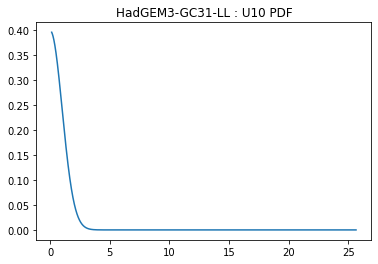

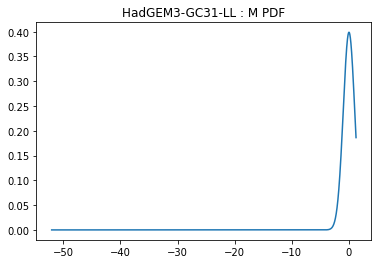

In [31]:
######## U10 PDF ##################
from scipy.stats import norm
fig = plt.figure()
plt.plot(np.sort(yy[indx]), norm.pdf(np.sort(yy[indx])))
# plt.legend()
plt.title('HadGEM3-GC31-LL : U10 PDF')
######################################

######## M PDF ##################
from scipy.stats import norm
fig = plt.figure()
plt.plot(xx[indx], norm.pdf(xx[indx]))
# plt.legend()
plt.title('HadGEM3-GC31-LL : M PDF')
######################################

In [78]:
# hb = plt.hexbin(xx, yy, gridsize=40, cmap='Blues')
# plt.ylabel('U10 [m/s]',fontsize='15')
# plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('GCM wind vs M\nfor 30N to 70N ocean only')

In [110]:
from scipy import stats
bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)


Text(0.5, 1.0, 'GCM-HadGEM3-GC31-LL')

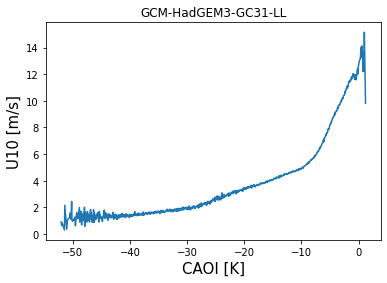

In [111]:
from skmisc.loess import loess
index = np.isnan(bin_means_x*bin_means)==False

# plt.plot(bin_means_x, bin_means)
# l = loess(bin_means_x[index], bin_means[index])
# l.fit()
# pred = l.predict(bin_means_x[index], stderror=True)
# conf = pred.confidence()

# lowess = pred.values
plt.plot(bin_means_x[index], bin_means[index])
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
plt.title('GCM-HadGEM3-GC31-LL')

In [ ]:
bin_means_x_gcm = bin_means_x[index]
bin_means_gcm   = lowess

In [ ]:
x_gcm = []
y_gcm = []


In [ ]:
x_gcm.append(bin_means_x_gcm)
y_gcm.append(bin_means_gcm)

# Observations

In [ ]:
import glob
merlist = np.sort(glob.glob('../data_merra/lat_30_70/new/MERRA2_*.nc'))
sfclist = np.sort(glob.glob('../data_merra/lat_30_70/surface/new/MERRA2_*.nc'))
maclist = np.sort(glob.glob('../MACLWP_dailymean/take/wind1deg*.nc4'))

In [ ]:
import netCDF4 as nc
import xarray as xr
p_mer_T   = []
p_mac_w   = []
sfc_mer_T = []
sfc_mer_P = []

for i in range(len(merlist)): #len(merlist)
    d_path = merlist[i]
    data   = nc.Dataset(d_path)
    # print(d_path)
    
    if i==0:
        merlat = data.variables['lat'][:]
        merlon = data.variables['lon'][:]
        merlev = data.variables['lev'][:]
        #shape latitude
        mer_lat = np.flip(merlat)
        mer_lat = np.array(mer_lat)
        #shape longitude
        mer_lon = np.array(merlon)
        
        
    merT   = data.variables['T'][:] #(time, lev, lat, lon)
    mer_T = np.array(merT[:,:,::-1,:])
    p_mer_T.extend(mer_T)
    
temp = np.array(p_mer_T)

for i in range(len(sfclist)): #len(merlist)
    s_path = sfclist[i]
    sdata  = nc.Dataset(s_path)
    # print(d_path)
    
    if i==0:
        sfclat = sdata.variables['lat'][:]
        sfclon = data.variables['lon'][:]
        #shape latitude
        sfc_lat = np.flip(sfclat)
        sfc_lat = np.array(sfc_lat)
        #shape longitude
        sfc_lon = np.array(sfclon)
        
    sfcT   = sdata.variables['TS'][:] 
    sfc_T = np.array(sfcT[:,::-1,:])
    sfc_mer_T.extend(sfc_T)
    
    sfcP   = sdata.variables['SLP'][:] 
    sfc_P = np.array(sfcP[:,::-1,:])
    sfc_mer_P.extend(sfc_P)
    
sfctemp = np.array(sfc_mer_T)
sfcpres = np.array(sfc_mer_P)

for i in range(len(maclist)): #len(maclist)
    ddpath = maclist[i]
    ddata  = nc.Dataset(ddpath)
    macw   = ddata.variables['sfcwind'][:] #(time,lat,lon)
    # print(ddpath)
    
    if i==0:
        maclat = ddata.variables['lat'][:]
        maclon = ddata.variables['lon'][:]
        #shape latitude
        mac_lat = np.array(maclat)
        slat_ind1 = np.where(mac_lat == mac_lat.flat[np.abs(mac_lat - (31)).argmin()])[0]
        slat_ind2 = np.where(mac_lat == mac_lat.flat[np.abs(mac_lat - (71)).argmin()])[0]
        p_mac_lat  = np.array(mac_lat[slat_ind1[0]:slat_ind2[0]])
        #shape longitude
        maclon[maclon > 180] = maclon[maclon > 180]-360
        mac_lon = np.array(maclon)
        p_mac_lon = []
        p_mac_lon.extend(mac_lon[180::])
        p_mac_lon.extend(mac_lon[0:180])
        p_mac_lon = np.array(p_mac_lon)
    n_w = macw[:,slat_ind1[0]:slat_ind2[0],180::]
    new_w = np.append(n_w,macw[:,slat_ind1[0]:slat_ind2[0],0:180],2)
    p_mac_w.extend(new_w)

wind = np.array(p_mac_w)
# wind = np.ma.masked_where(p_mac_w == np.min(p_mac_w), p_mac_w)
# # wind = np.ma.compressed(wind)
# wind = np.ma.masked_where(wind < 5, wind)
# wind = np.ma.compressed(wind)
    

In [ ]:
merlev

In [ ]:
print(sfclat[0],sfclat[-1])
print(sfc_lat[0],sfc_lat[-1])
print(mer_lat[0],mer_lat[-1])
print(p_mac_lat[0],p_mac_lat[-1])


In [ ]:
print(np.shape(temp[:,1,:,:]))
print(np.min(sfcpres))

In [ ]:
theta_850 = np.array(np.multiply(temp[:,1,:,:], (sfcpres/85000)**(Rd/Cp)))


In [ ]:
p_CAOI = np.array(np.subtract(sfctemp,theta_850))


In [ ]:
maskm = np.ones((1096,len(mer_lat),len(mer_lon)))

for a in range(len(mer_lat)):
    for b in range(len(mer_lon)):
        if globe.is_land(mer_lat[a], mer_lon[b])==True:
            maskm[:,a,b] = 0

In [ ]:
plot_CAOI = np.array(np.multiply(maskm,p_CAOI))
plot_wind = np.array(np.multiply(maskm,wind))


In [ ]:
plot_mer_theta = plot_CAOI.ravel()
plot_mac_wind  = plot_wind.ravel()

In [ ]:
print(np.min(plot_mer_theta), np.min(plot_mac_wind))

In [ ]:
ind = np.argsort(plot_mer_theta)
xx = np.sort(plot_mer_theta)
yy = plot_mac_wind[ind]

In [ ]:
x_new = xx[xx<np.max(xx)]
y_new = yy[xx<np.max(xx)]

xx_new = x_new[y_new>0]
yy_new = y_new[y_new>0]

In [ ]:
plt.plot(xx_new,yy_new)

In [ ]:
indx = np.isnan(xx_new*yy_new)==False

In [ ]:
np.where(indx==False)

In [ ]:
bin_means, bin_edges, binnumber = stats.binned_statistic(xx_new, yy_new, 'mean', bins=1000)
bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx_new, xx_new, 'mean', bins=1000)


In [ ]:
index = np.isnan(bin_means_x*bin_means)==False

In [ ]:



# plt.plot(bin_means_x, bin_means)
l = loess(bin_means_x[index], bin_means[index])
l.fit()
pred = l.predict(bin_means_x[index], stderror=True)
conf = pred.confidence()

lowess = pred.values
plt.plot(bin_means_x[index], lowess)
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
plt.title('observation')

In [ ]:
bin_means_x_obs = bin_means_x[index]
bin_means_obs   = lowess

In [ ]:
fig= plt.figure(figsize=(5, 6))
plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
plt.xticks(np.arange(-20,6,5),fontsize='12')
plt.yticks(np.arange(4,13),fontsize='12')
plt.xlim([-20,5])
plt.ylim([3,13])
plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('MACLWP wind vs MERRA2 M\nfor 30N to 70N ocean only\n850hPa')

# PPE

In [ ]:
enn = np.arange(201,251)

In [ ]:
ppe_var = ['U10', 'PSL', 'T850','TREFHT']

In [ ]:
for en in enn:
    if en != 175:
        for i in ppe_var: #TREFHT was used since no TS. Should double check this.
            d_path = '/glade/campaign/cgd/projects/ppe/cam_ppe/rerun_PPE_250/PD/PD_timeseries/PPE_250_ensemble_PD.'+f'{en:03d}'+'/atm/hist/cc_PPE_250_ensemble_PD.'+f'{en:03d}'+'.h1.'+str(i)+'.nc'
            data =xr.open_dataset(d_path)

            if en == enn[0]:
                lon  = data.variables['lon'][:]  #(lon: 288) [0.0, 1.25, 2.5, ... 356.25, 357.5, 358.75]
                lat  = data.variables['lat'][:]  #(lat: 192) [-90.0 , -89.057592, -88.115183, ... 88.115183,  89.057592, 90.0]
                time = data.variables['time'][:] #(time: 36)

            locals()[str(en)+'_'+i] = data.variables[i][:]

In [ ]:
x_lat = np.array(lat)
lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (30)).argmin()])[0]
lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (70)).argmin()])[0]
lat_new  = lat[lat_ind1[0]:lat_ind2[0]]

mask = np.ones((1096,len(lat_new),len(lon)))

for a in range(len(lat_new)):
    for b in range(len(lon)):
        if globe.is_land(lat_new[a], lon[b]-180.)==True:
            mask[:,a,b] = 0

for en in enn:
    if en != 175:
        # print(en)
        for i in ppe_var: #
            tmp  = locals()[str(en)+'_'+i]
            tmp2 = tmp[0:1096,lat_ind1[0]:lat_ind2[0],:]
            locals()['MID'+i+'_'+str(en)] = np.multiply(mask,tmp2)

In [ ]:
for en in enn:
    if en != 175:
        locals()['theta_850_'+str(en)] = np.multiply(locals()['MIDT850_'+str(en)],(np.divide(locals()['MIDPSL_'+str(en)],85000))**(Rd/Cp))

In [ ]:
np.shape(theta_850_247)

In [ ]:
for en in enn:
    if en != 175:
        locals()['M_'+str(en)]   = np.array(np.subtract(locals()['MIDTREFHT_'+str(en)],locals()['theta_850_'+str(en)])).reshape(-1)
        locals()['U10_'+str(en)] = np.array(locals()['MIDU10_'+str(en)]).reshape(-1)

In [ ]:
np.max(U10_246)

In [ ]:
from scipy import stats
from skmisc.loess import loess

In [ ]:
fig= plt.figure(figsize=(6, 7))
# plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='CESM2') #marker='*', markersize=12,
# plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='Observations')
for en in enn:
    if en != 175:
        x = locals()['M_'+str(en)]
        y = locals()['U10_'+str(en)]
        ind = np.argsort(x)
        xx = np.sort(x)
        yy = y[ind]

        indx = np.isnan(xx*yy)==False

        bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
        bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)

        index = np.isnan(bin_means_x*bin_means)==False

        # plt.plot(bin_means_x, bin_means)
        l = loess(bin_means_x[index], bin_means[index])
        l.fit()
        pred = l.predict(bin_means_x[index], stderror=True)
        conf = pred.confidence()

        lowess = pred.values


        if en==250:
            plt.plot(bin_means_x[index], lowess, alpha=0.2,label='PPE')

        else:
            plt.plot(bin_means_x[index], lowess, alpha=0.2)
    

# plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
# plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
# plt.xticks(np.arange(-20,6,5),fontsize='12')
# plt.yticks(np.arange(4,13),fontsize='12')
plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='CESM2')
plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.xlim([-20,5])

plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('CAM6 PPE')
# plt.savefig('ppe.png')